8


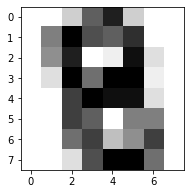

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.84      0.43      0.57       164
           2       0.84      0.91      0.88       161
           3       0.99      0.64      0.78       166
           4       0.95      0.95      0.95       164
           5       0.90      0.73      0.81       162
           6       0.94      0.98      0.96       164
           7       0.90      0.94      0.92       161
           8       0.61      0.79      0.69       156
           9       0.53      0.85      0.65       161

    accuracy                           0.82      1618
   macro avg       0.85      0.82      0.82      1618
weighted avg       0.85      0.82      0.82      1618




C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[157   0   0   0   1   1   0   0   0   0]
 [  0  71  18   0   0   1   7   0  62   5]
 [  0   0 147   1   0   0   0   0   3  10]
 [  0   0   3 107   0   2   0   2   6  46]
 [  0   0   0   0 155   0   1   5   0   3]
 [  0   0   0   0   5 118   1   0   0  38]
 [  3   0   0   0   0   0 160   0   1   0]
 [  0   0   0   0   0   4   0 151   6   0]
 [  0   3   6   0   1   1   1   2 123  19]
 [  0  11   0   0   1   4   0   7   1 137]]


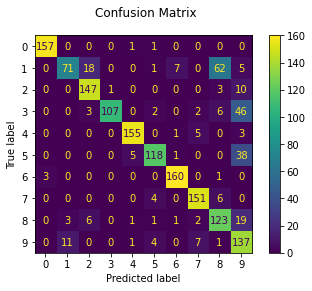

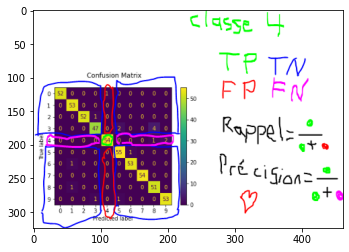

In [3]:
" TP "
"Identifiez la structure de la base de données" #OK
"Commentez le processus d'apprentissage" #OK
"Expliquez l'évaluation de l'apprentissage à travers :"
"la matrice de confusion, le rappel, la précision, le F1-score et le support" #OK



#print(__doc__)

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


# Identifier la structure de la bdd

## dictionnaire, notre base de donnée
digits = datasets.load_digits()

## les 1797 images de la base de données (en flatten, donc taille 64, voir digits.images pour les avoir en 8x8)
### print(digits.data)

## les 1797 résultats de quels nombres les images correspondent
### print(digits.target)

## Il s'agit du cadre des données, ici à none
### digits.frame

## le nom des composantes des données, ici le nom des pixels des images (donc 64 noms car images 8x8)
### digits.feature_names

## Les noms des classes possibles (0 à 9)
### digits.target_names

## Première image de la bdd en 8x8
### digits.images[0]

## le nombre de données
### len(digits.data)

## (nombre d'image, hauteur, largeur)
s=digits.images.shape

## Affichage de l'image 
nb = 1
for i in range(500,500+nb):
    print (digits.target[i])
    plt.figure(1, figsize=(3, 3))
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

## flatten the images 8x8 -> 64
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# "Commentez le processus d'apprentissage"

## On va ici utiliser la méthode d'apprentissage du RBF SVM avec un coefficient à 0.001

## Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

## Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.9, shuffle=False)

## Learn the digits on the train subset
clf.fit(X_train, y_train)

## Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Expliquez l'évaluation de l'apprentissage à travers :
#                      la matrice de confusion, le rappel, la précision, le F1-score et le support


## La matrice de confusion

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

### La matrice de confusion est un tableau len(digits.target_names)*len(digits.target_names) (ici 10x10)
### En abscice il y a les nombres qui étaient prévu, et en ordonnées nous avons les nombres obtenues

dessin = plt.imread("confusion_matrice.png")
plt.imshow(dessin)
plt.show()

### avec ce shéma propre à la classe 4, nous constatons les différents éléments de la matrice de confusion :

#### les vrais positifs correspondent aux nombres obtenus comme prévu (case verte)
#### Les vrais négatifs correspondent aux nombres non-obtenus comme il était prévu (ne pas reconnaître un 0 alors qu'on avait prévu un 4) (cases bleues)
#### Les faux positifs correspondent aux moments où nous avions prévu un nombre et que nous en avons eu un autre (on a eu un 0 au lieu du 4)  (cases rouges)
#### Les faux négatifs correspondent aux moments où nous n'avions pas prévu un nombre et que nous l'avons eu quand même (cases roses)

## Le rappel ( = le recall )

### recall = vraiPositifs / (vraiPositifs + fauxPositifs)

## La précision

### précision = vraiPositifs / (vraiPositifs + fauxNégatifs)

## Le F1-score

## Le support
